In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [3]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
# !pip install ydata-profiling

# from ydata_profiling import ProfileReport

# profile = ProfileReport(df)

# profile.to_file(output_file="output.html")


In [ ]:
df.shape

In [4]:
df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

**DATA CLEANING :**

Let's rename the complex named columns for easy understanding

In [5]:
df.rename(columns = {'approx_cost(for two people)' : 'approx_cost', 'listed_in(city)' : 'area'}, inplace = True)

Let's drop the irrelevant columns

In [6]:
df.drop(['url', 'address','menu_item', 'reviews_list', 'dish_liked', 'phone', 'listed_in(type)'], axis = 1, inplace=True)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


In [ ]:
df.shape

In [ ]:
df.info()

**How many null values of null colom ??**

In [ ]:
51717-43942 

In [8]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].fillna(np.nan)
df['rate'] =  df['rate'].str.replace(" ", "")


In [10]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [ ]:
# df['rate'].fillna('0', inplace=True)

In [11]:
df['rate'].size

51717

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [13]:
#unique Values
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost'] = df['approx_cost'].str.replace("nan", "NaN")
df['approx_cost'] = df['approx_cost'].fillna('NaN')
df['approx_cost'] = df['approx_cost'].str.replace(",","" )

In [15]:
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [16]:
df['approx_cost'] = df['approx_cost'].str.replace("nan", "NaN")
df['approx_cost'] = df['approx_cost'].fillna('NaN')
df['approx_cost'] = df['approx_cost'].str.replace(",","" )

In [17]:
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
df['approx_cost'] = df['approx_cost'].astype(float)
df['rate'] = df['rate'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [20]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [21]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [22]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

**From the above execution we found columns "location", "rest_type", "cuisines", "approx_cost" have less number of null values as compared to "rate" column. Let's drop the null values from them
**

In [23]:
df = df[df["location"].notna()]
df = df[df["rest_type"].notna()]
df = df[df["cuisines"].notna()]
df = df[df["approx_cost"].notna()]

In [ ]:
df.shape

In [24]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

**Let's Handle the null values in the "rate" coulmns
**

In [25]:
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [26]:
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)
iqr=q3-q1

In [27]:
q1,q3

(3.4, 4.0)

In [28]:
iqr

0.6000000000000001

In [29]:
minimum_range = q1 - (1.5 * iqr)
maximum_range = q3 + (1.5 * iqr)

In [30]:
minimum_range,maximum_range

(2.5, 4.9)

In [31]:
outliers = len(df[(df['rate'] < minimum_range) | (df['rate'] > maximum_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


In [32]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51148, dtype: float64

In [33]:
df['rate'].median()

3.7

In [34]:
df['rate'] = df['rate'].fillna(df['rate'].median())


In [35]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 51148, dtype: float64

In [36]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [37]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
print(f'There are {len(Numerical_features)} numerical features and their names are {Numerical_features}') 

There are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


***Let's check for the distrubution of the numerical features***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


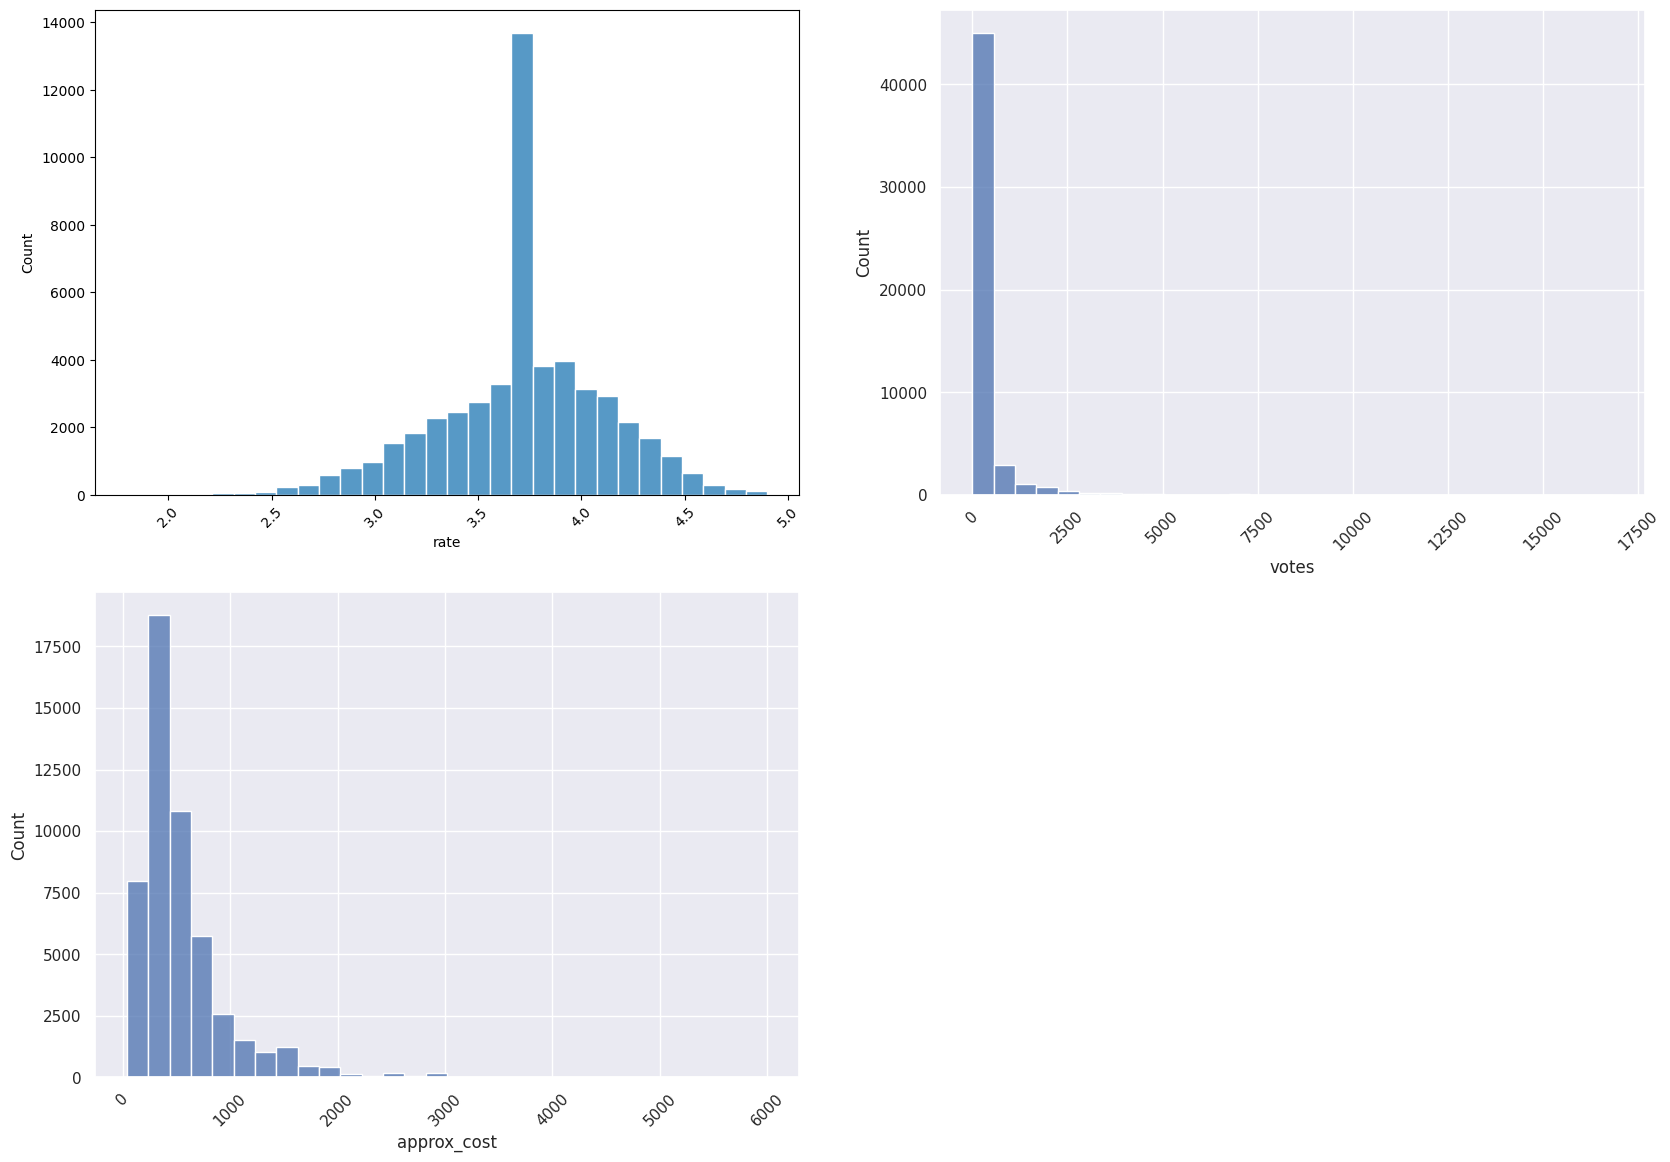

In [38]:
plt.figure(figsize=(20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df, x=i[1], bins=30)
    plt.xticks(rotation=45)



In [39]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df

1. # Data Visualization
***checking for the Most famous restaurants chains in Bangaluru***

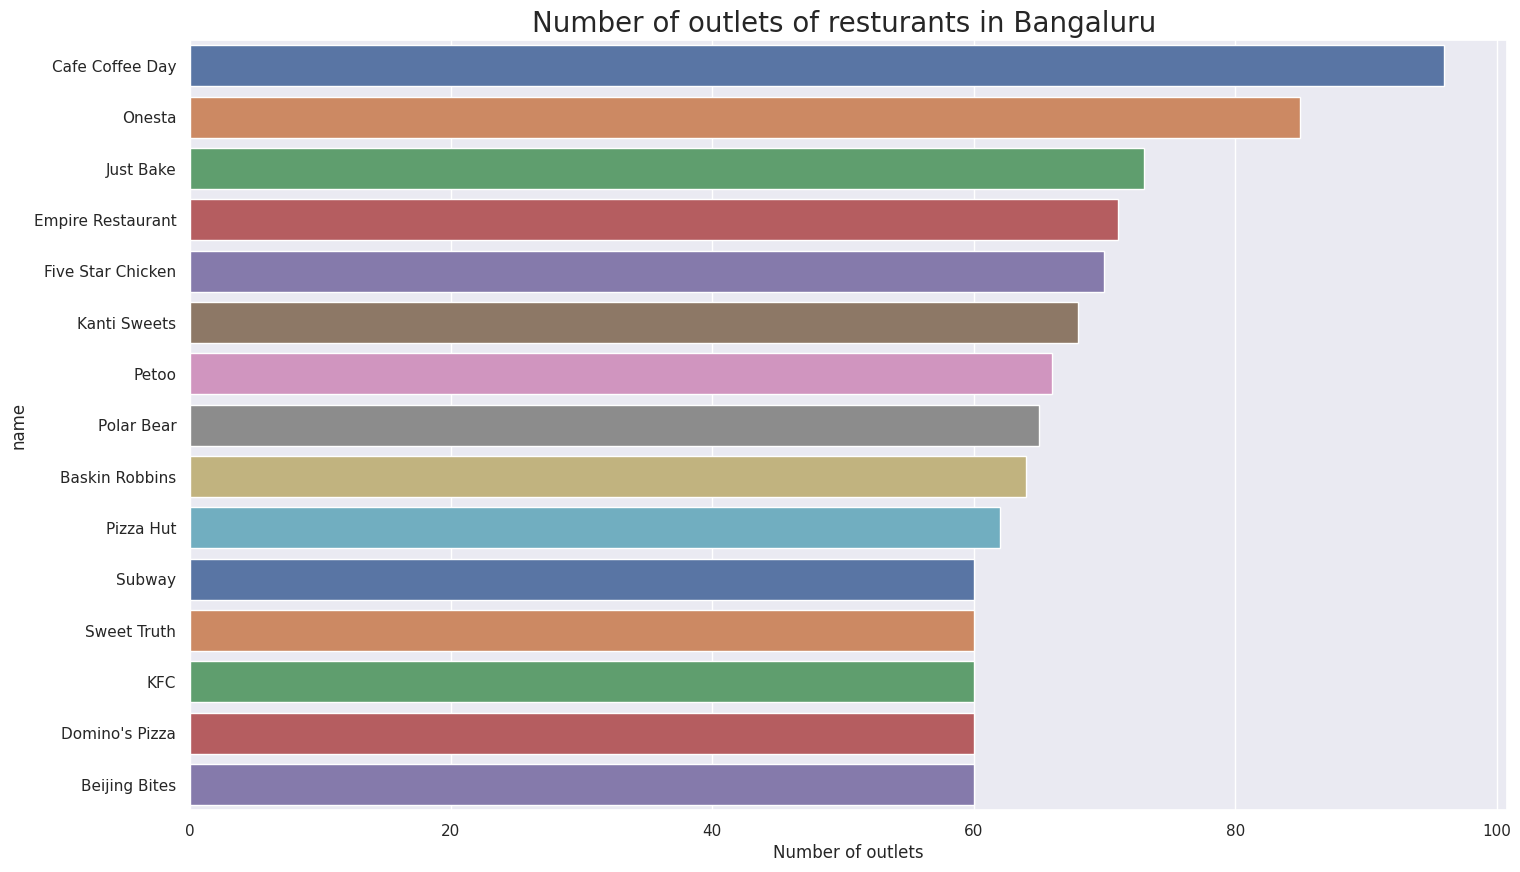

In [40]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette= "deep")
plt.title("Number of outlets of resturants in Bangaluru ", fontsize=20)
plt.xlabel("Number of outlets")
plt.show()


****Let's check for the restaurants who have got the highest orders****

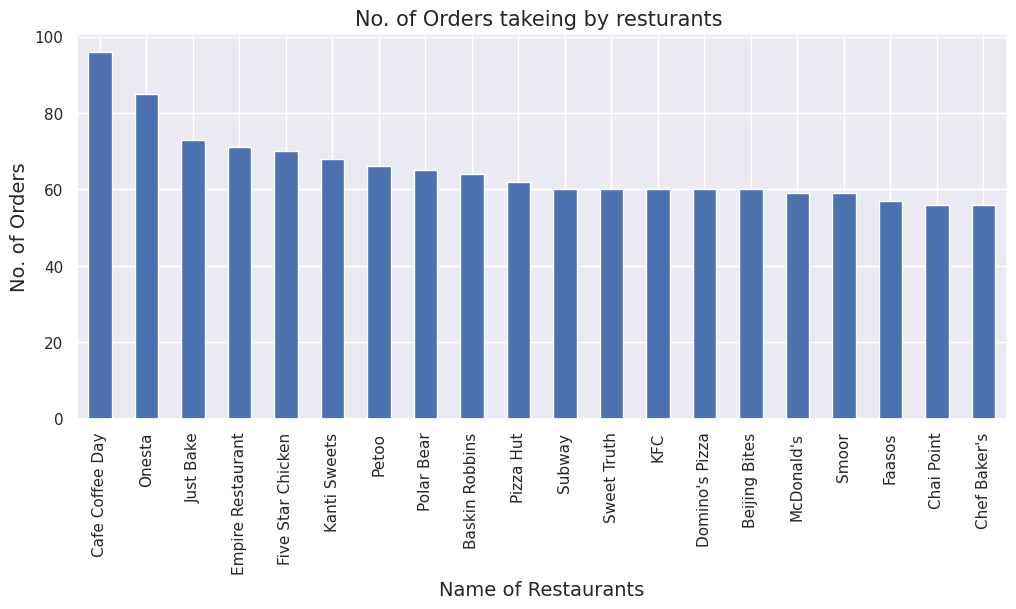

In [41]:
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:20]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("No. of Orders takeing by resturants ", fontsize=15)
plt.show()


****Let's check how many restaurants have online ordering facilities****

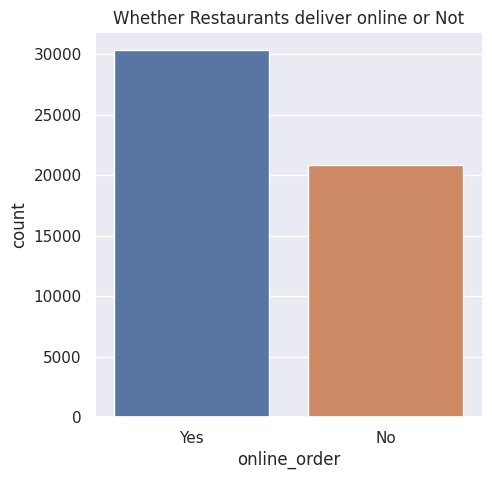

In [42]:
sns.countplot(x=df['online_order'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

****Let's check how many restaurants offer Pre Table bookings****


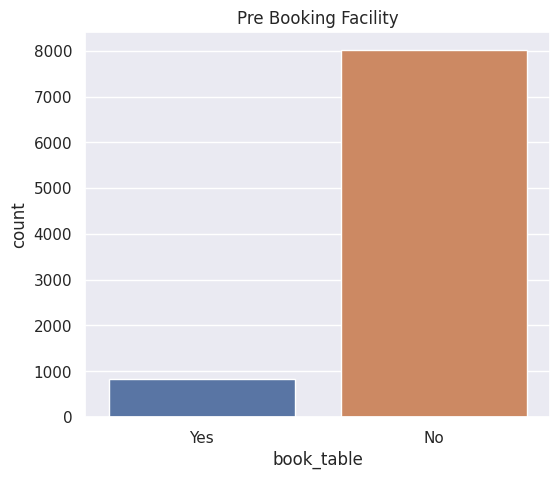

In [43]:
data = df[['name', 'book_table']].drop_duplicates()
plt.figure(figsize = (6,5))
fx = sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 12)
plt.show()


****Let's check the locations that have highest orders****


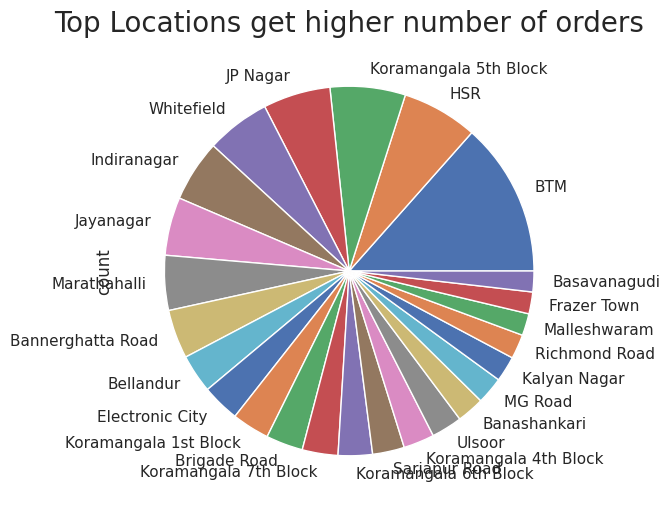

In [46]:
plt.figure(figsize = (12,6))
data = df['location'].value_counts()[0:25]
data.plot(kind='pie')
plt.title ('Top Locations get higher number of orders', size = 20)
plt.show()

****Let's check for the most common ratings for the orders****


/tmp/ipykernel_33/182072263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'],bins=30)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rate', ylabel='Density'>

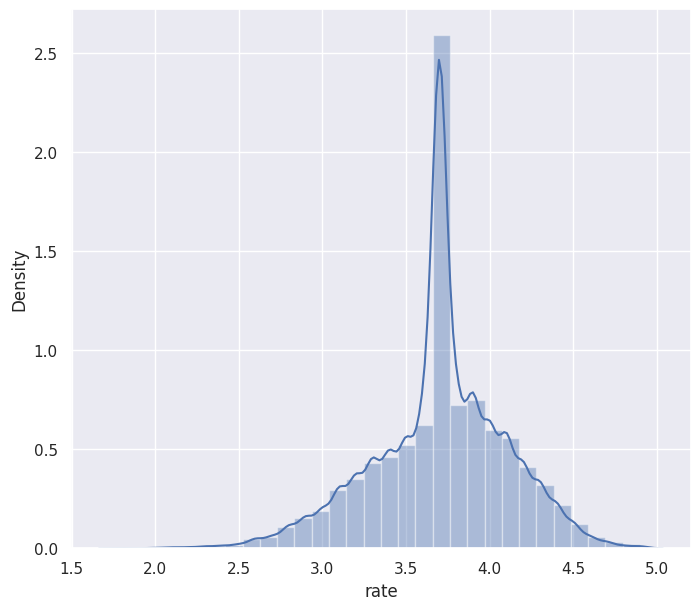

In [45]:
plt.figure(figsize=(8,7))
sns.distplot(df['rate'],bins=30)

****Let's check for the Common Approximate Costs for meal of two people****


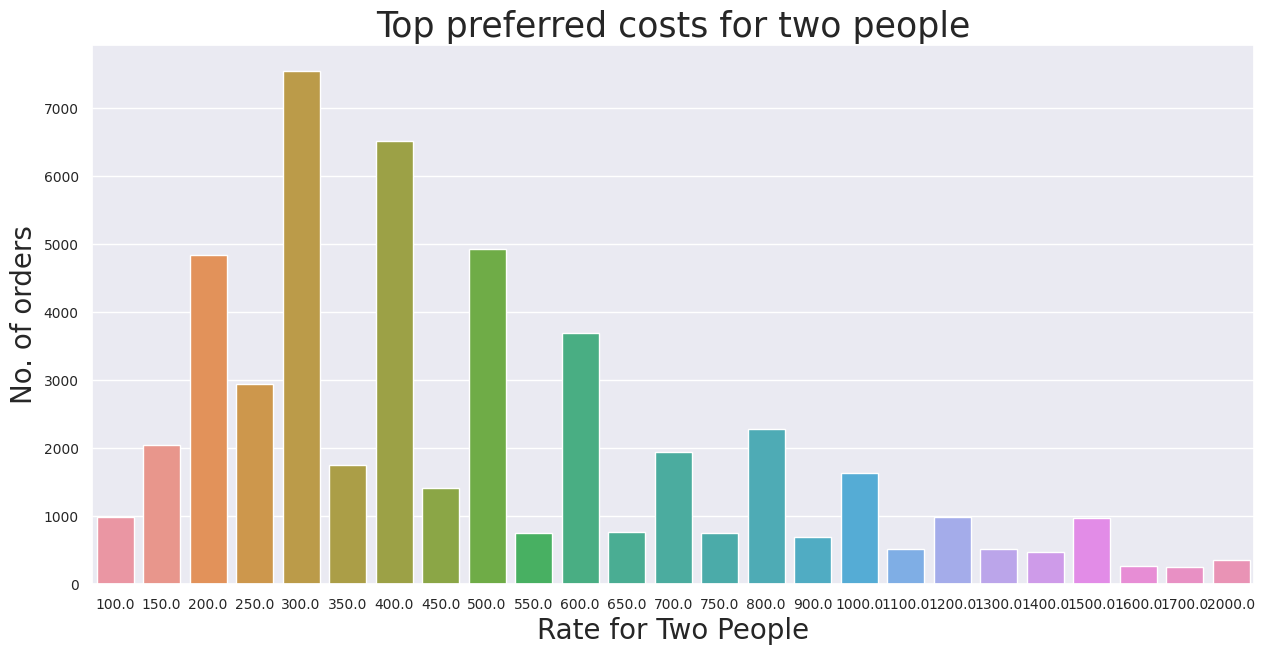

In [47]:
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data = data.set_index('approx_cost')
plt.figure(figsize = (15, 7))
sns.barplot(x = data.index, y=data['count'])
plt.xlabel('Rate for Two People', size=20)
plt.ylabel('No. of orders', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Top preferred costs for two people', size = 25)
plt.show()

****Let's check top 10 types of the orders restaurants offer****


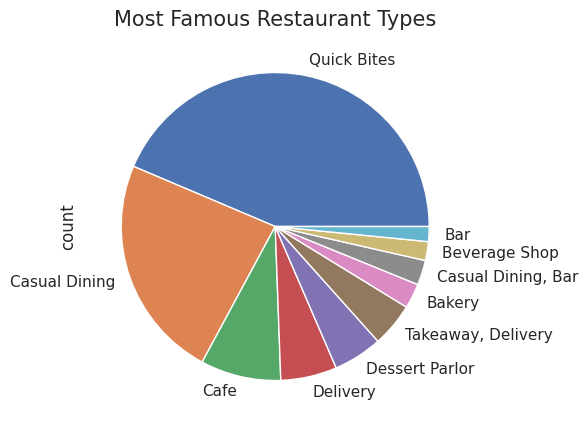

In [48]:
plt.figure(figsize=(12,5))
abc = df['rest_type'].value_counts()[:10]
abc.plot(kind='pie')
plt.title("Most Famous Restaurant Types",fontsize=15)
plt.show()

****Let's check for Most famous Cusines among People****


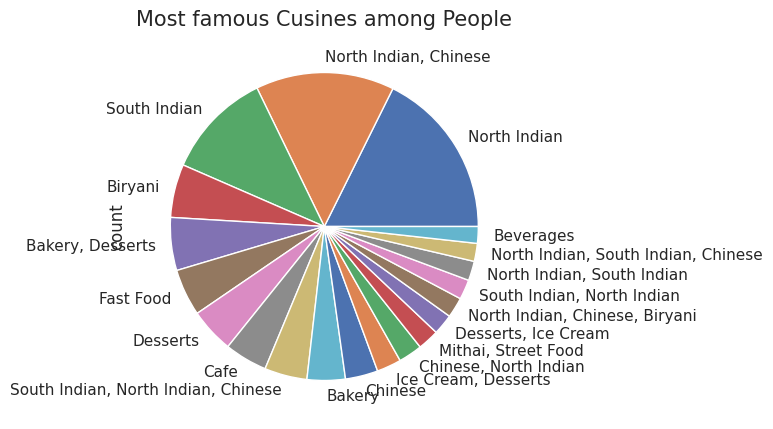

In [49]:
plt.figure(figsize=(12,5))
xyz = df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most famous Cusines among People",fontsize=15)
plt.show()

****Let's check for the Top Locations with Most Number of Restaurants****


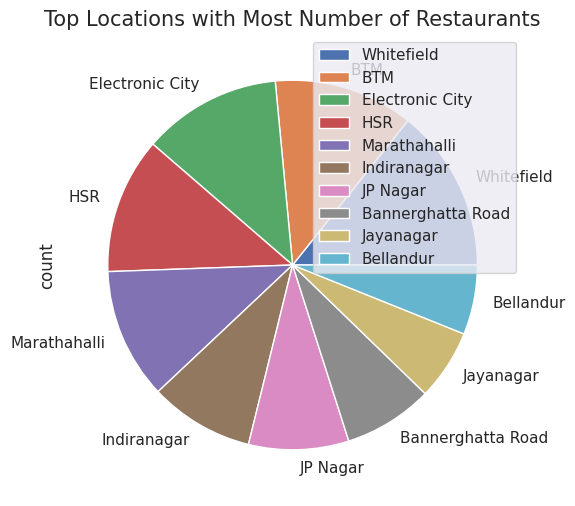

In [50]:
loc = pd.DataFrame(df.groupby(by='location')['name'].nunique())
loc.columns = ['count']
loc.sort_values(by='count', ascending= False, inplace=True)
plt.rcParams['figure.figsize'] = (8,6)
ax = loc[0:10].plot(kind='pie', subplots = True)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

****Let's find the Relationship between the features.****


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

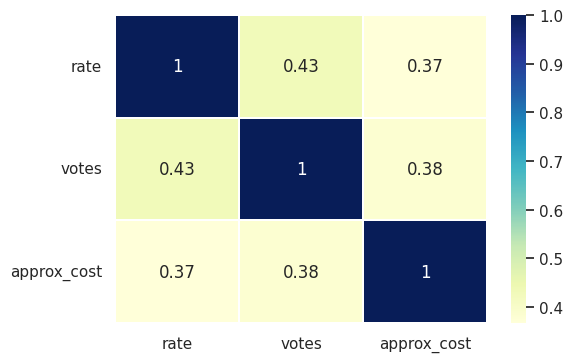

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['rate','votes','approx_cost']].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

# Converting the categorical variables into a numeric format


In [52]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [53]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

/tmp/ipykernel_33/1438068132.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.online_order[df.online_order == 'Yes'] = 1
/tmp/ipykernel_33/1438068132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [54]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

/tmp/ipykernel_33/2276401079.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.book_table[df.book_table == 'Yes'] = 1
/tmp/ipykernel_33/2276401079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [55]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))
for rt in unique_rts:
    rest_df[rt] = int(0)   
rest_df.head()

,rest_type,Bakery,Food Truck,Confectionery,Pop Up,Irani Cafee,Dessert Parlor,Lounge,Club,Beverage Shop,...,Pub,Microbrewery,Bar,Quick Bites,Dhaba,Takeaway,Bhojanalya,Food Court,Kiosk,Meat Shop
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
count = 0
for i in rts:
    rest_df.loc[count, i] = int(1)       
    count+=1

In [58]:
rest_df.head()


,rest_type,Bakery,Food Truck,Confectionery,Pop Up,Irani Cafee,Dessert Parlor,Lounge,Club,Beverage Shop,...,Pub,Microbrewery,Bar,Quick Bites,Dhaba,Takeaway,Bhojanalya,Food Court,Kiosk,Meat Shop
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
rest_df.drop(['rest_type'], axis = 1, inplace=True)
rest_df.head()

,Bakery,Food Truck,Confectionery,Pop Up,Irani Cafee,Dessert Parlor,Lounge,Club,Beverage Shop,Cafe,...,Pub,Microbrewery,Bar,Quick Bites,Dhaba,Takeaway,Bhojanalya,Food Court,Kiosk,Meat Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

/tmp/ipykernel_33/2016498376.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cuisines_df[cn] = 0
/tmp/ipykernel_33/2016498376.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cuisines_df[cn] = 0
/tmp/ipykernel_33/2016498376.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cuisines_df[cn] = 

,cuisines,Mangalorean,Kashmiri,Modern Indian,Salad,Continental,Street Food,Bohri,Rajasthani,Burmese,...,Tex-Mex,Juices,Italian,French,Bar Food,Biryani,Asian,South American,Hot dogs,Russian
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    
count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
    
    
cuisines_df.head()

,cuisines,Mangalorean,Kashmiri,Modern Indian,Salad,Continental,Street Food,Bohri,Rajasthani,Burmese,...,Tex-Mex,Juices,Italian,French,Bar Food,Biryani,Asian,South American,Hot dogs,Russian
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Mangalorean,Kashmiri,Modern Indian,Salad,Continental,Street Food,Bohri,Rajasthani,Burmese,Raw Meats,...,Tex-Mex,Juices,Italian,French,Bar Food,Biryani,Asian,South American,Hot dogs,Russian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


In [65]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,False,False,False,False,False,False,False,False,False,False


# Feature selection

In [67]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])

Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')


In [68]:
x1 = data_with_location.drop("rate", axis = 1).values
y1 = data_with_location["rate"].values
print("X = ", x1)
print("Y = ", y1)

X =  [[1 1 775 ... False False False]
 [1 0 787 ... False False False]
 [1 0 918 ... False False False]
 ...
 [0 0 0 ... False False False]
 [0 1 236 ... False False False]
 [0 0 13 ... False False False]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


In [69]:
x2 = data_with_area.drop("rate", axis = 1).values
y2 = data_with_area["rate"].values
print("X = ", x2)
print("Y = ", y2)

X =  [[1 1 775 ... False False False]
 [1 0 787 ... False False False]
 [1 0 918 ... False False False]
 ...
 [0 0 0 ... False False True]
 [0 1 236 ... False False True]
 [0 0 13 ... False False True]]
Y =  [4.1 4.1 3.8 ... 3.7 4.3 3.4]


****Import extratreesregressor****

In [70]:
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
imp_features1 = ExtraTreesRegressor()
imp_features1.fit(x1, y1)
print(imp_features1.feature_importances_)

[ 1.71531331e-02  1.68839986e-01  2.87052003e-01  4.76842526e-02
  3.01127172e-03  8.45650184e-05  1.01823670e-05  4.05927645e-18
  7.62510233e-07  3.43095075e-03  3.30597054e-03  7.76188746e-05
  1.28788561e-03  1.29606160e-02  9.40898206e-04  5.67607200e-04
  5.56603591e-03  7.18987460e-04  1.01386102e-02  1.68801172e-03
  7.83140173e-04  2.50892878e-03  1.03953162e-02  2.00273564e-04
  2.97610102e-03  8.65417707e-07  3.50038448e-03  3.58848605e-04
  3.93310476e-06  2.00075920e-03  1.82457939e-04  2.26516510e-04
  2.78908485e-03  6.10864889e-03  6.13049275e-03  1.05628942e-05
  4.74795417e-04  2.38992688e-04  4.75343286e-06  6.89930259e-06
  4.54759384e-03  6.13702614e-05  4.15670092e-06  2.36736802e-03
  5.70815001e-04  1.47178923e-03  1.27071987e-06  5.81067037e-04
  3.58431393e-03  8.80179511e-04  1.23832875e-06  3.85677759e-03
  3.69861108e-05  3.04823029e-03  5.58232956e-06  1.69995099e-03
  9.67242800e-06  7.95895001e-06  2.51917839e-05  3.92000698e-04
  3.26234413e-04  2.25812

<Axes: >

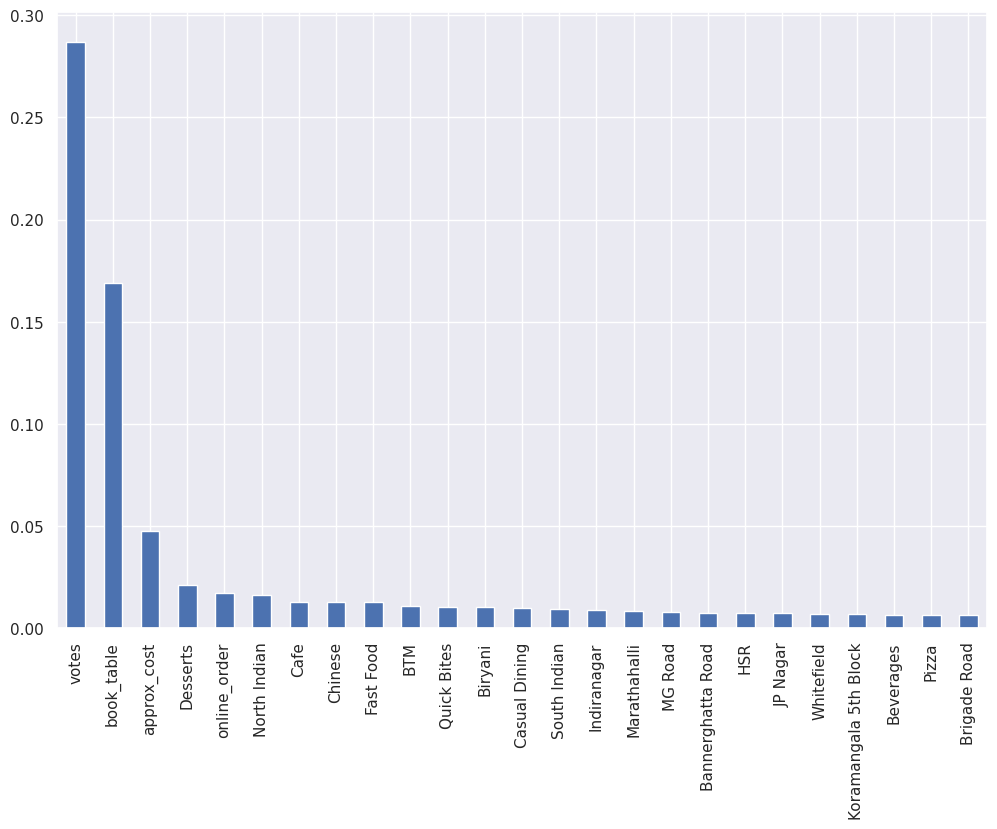

In [72]:
plt.figure(figsize = (12, 8))
columns = data_with_location.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features1.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

In [73]:
imp_features2 = ExtraTreesRegressor()
imp_features2.fit(x2, y2)
print(imp_features2.feature_importances_)

[ 2.13811763e-02  1.67692621e-01  3.18909427e-01  7.26322832e-02
  4.06608660e-03  2.11231608e-04  2.00912172e-05  3.11639254e-16
  1.74571449e-06  3.91151835e-03  3.94142457e-03  9.78502760e-05
  1.62010892e-03  1.44737655e-02  1.31468977e-03  7.69081804e-04
  6.63195045e-03  8.90504519e-04  1.18746004e-02  2.79456415e-03
  9.88766759e-04  3.37728489e-03  1.25270586e-02  1.99364179e-04
  3.70272710e-03  9.58042089e-07  3.87900757e-03  5.11020775e-04
  1.41536478e-05  2.94486629e-03  2.09329257e-04  1.83259247e-04
  3.24899763e-03  9.15561078e-03  7.85863956e-03  1.89475578e-05
  7.22360393e-04  2.70395629e-04  8.45748927e-06  1.13895624e-05
  6.93800435e-03  1.02486318e-04  4.62563200e-06  3.27008683e-03
  8.79211252e-04  2.15568983e-03  6.21939469e-06  6.95195745e-04
  4.74258728e-03  9.67958689e-04  3.38487818e-07  5.54187099e-03
  4.85553274e-05  3.66284384e-03  2.76283837e-05  2.54514787e-03
  9.86781385e-06  8.63662520e-06  7.57371424e-05  5.21490541e-04
  3.96528723e-04  4.34681

<Axes: >

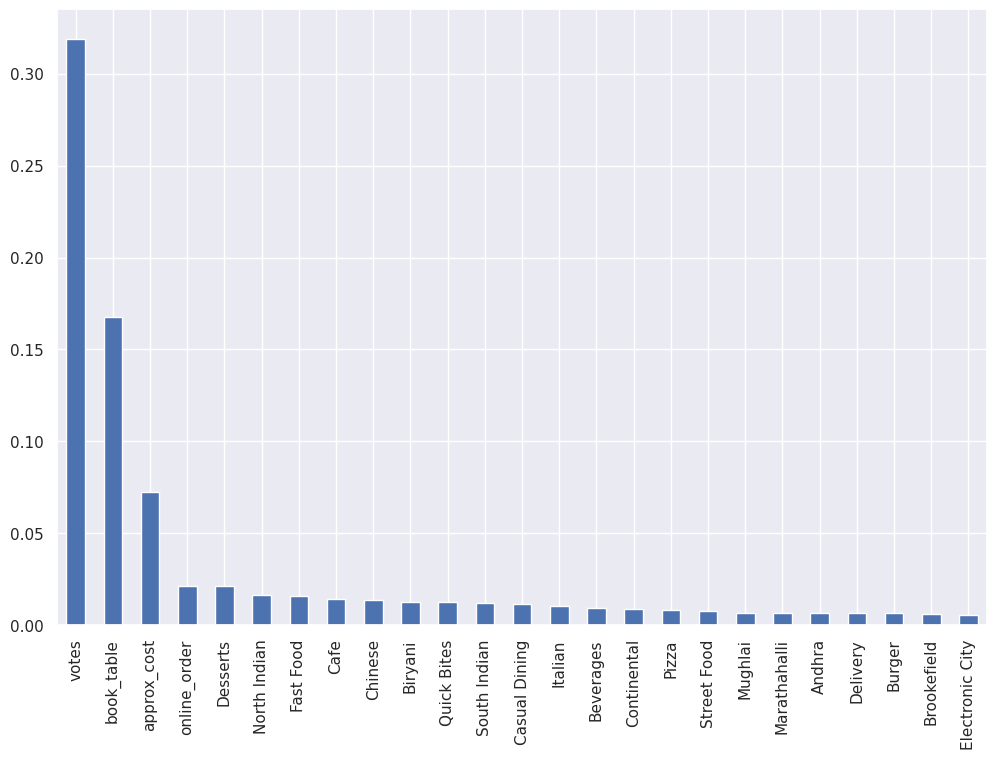

In [74]:
plt.figure(figsize = (12,8))
columns = data_with_area.drop("rate", axis = 1).columns
fseries = pd.Series(imp_features2.feature_importances_, index = columns)
fseries.nlargest(25).plot(kind = "bar")

# Data Splitting 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=15)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=20)


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear Regression

In [78]:
lr1 = LinearRegression()
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [79]:
Y_lr1= lr1.predict(X1_test)
Y_lr1[:200]

array([3.73884728, 3.90101444, 3.53167758, 4.20374996, 4.02889949,
       3.67681521, 4.02607386, 3.80251236, 3.5424456 , 4.1050333 ,
       3.59043129, 4.19611988, 3.58664399, 3.70030427, 4.24484436,
       3.80315619, 3.63049756, 3.83908189, 4.46547822, 4.2189195 ,
       4.18232861, 3.55973126, 3.56203247, 3.71326872, 3.54218263,
       3.75701028, 3.52279623, 3.57415486, 3.41003197, 3.83320466,
       3.56986342, 3.9672283 , 3.4935967 , 4.44211617, 3.82538819,
       3.59658165, 3.52299977, 3.45318545, 3.74577438, 3.73942475,
       3.54477976, 3.4842335 , 3.71852812, 3.55464071, 3.53829127,
       3.63671115, 3.5531868 , 3.57560039, 3.59940276, 3.55227514,
       3.98351053, 3.45102417, 3.46745317, 3.72622652, 3.6710174 ,
       3.72497499, 3.64254601, 3.50965576, 3.65998791, 3.84363589,
       3.6948295 , 3.55520109, 3.56802363, 3.68980016, 3.74443285,
       4.24041163, 3.70447476, 3.91486372, 3.70366021, 3.62261723,
       3.72037058, 3.44081211, 3.47375314, 3.90026093, 3.46644

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


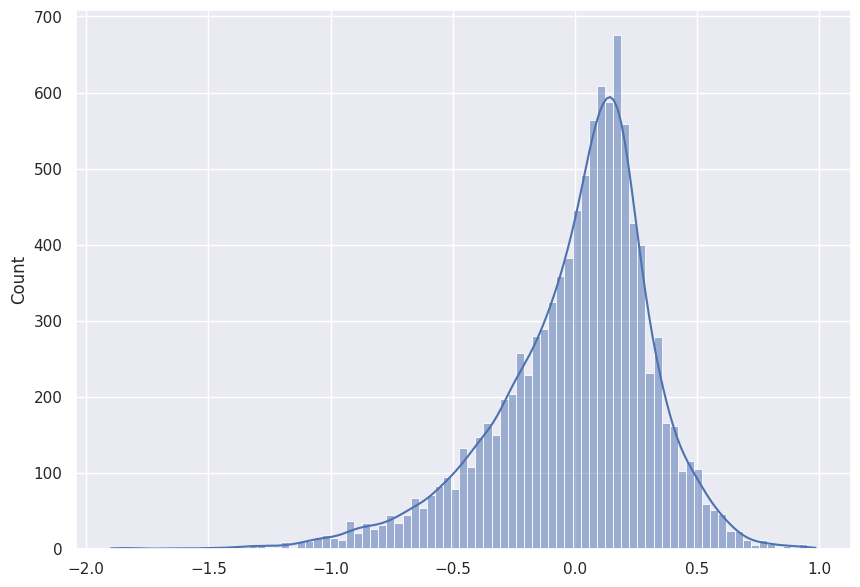

In [80]:
plt.figure(figsize=(10,7))
sns.histplot(Y1_test - Y_lr1, kde=True)
plt.show()

**LR for area**

In [81]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [82]:
Y_lr2 = lr2.predict(X2_test)
Y_lr2[:200]

array([3.73473279, 3.62153109, 4.11967541, 4.85890438, 4.08668557,
       3.7160198 , 4.14278196, 4.0533771 , 3.41451262, 3.80321687,
       4.00241666, 3.66098777, 3.57317677, 4.60277585, 3.536643  ,
       3.71100212, 3.86811303, 3.78506346, 3.58570366, 3.86528129,
       3.64649689, 3.7188761 , 4.08361159, 3.54844806, 3.58762844,
       3.61164558, 3.67767471, 3.59062466, 3.75747224, 3.65335985,
       3.65992716, 3.49169282, 3.83928249, 3.70803434, 3.51334544,
       4.10306812, 3.72519937, 3.46967848, 3.58668921, 3.83014591,
       3.51441354, 3.62937515, 3.81310689, 3.60272223, 3.443481  ,
       3.67010517, 3.93498439, 3.49701501, 4.12719899, 3.62581391,
       3.72341217, 3.48169912, 3.86496641, 3.58721765, 3.52304722,
       3.50069503, 3.69039359, 3.69654638, 3.66828035, 3.55711609,
       3.51280741, 3.52507102, 3.91060755, 3.6319637 , 3.59614198,
       3.62584413, 3.55328672, 3.81503815, 3.54529126, 3.74767359,
       3.46909733, 3.711164  , 3.61472773, 3.66245322, 4.29677

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


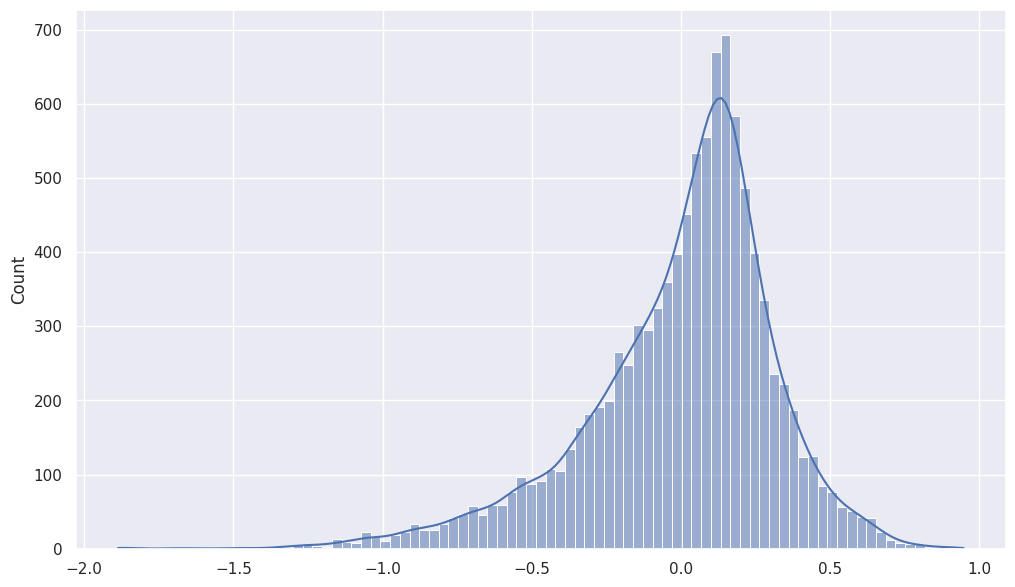

In [83]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test-Y_lr2, kde=True)
plt.show()

#  Random Forest Regression


In [84]:
rf1 = RandomForestRegressor()
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [85]:
Y_rf1 = rf1.predict(X1_test)
Y_rf1[:100]

array([3.61      , 4.099     , 3.7       , 4.4       , 4.022     ,
       4.06366667, 4.384     , 3.8       , 3.604     , 4.085     ,
       3.554     , 4.5       , 3.798     , 3.4       , 4.275     ,
       3.9       , 3.801     , 3.306     , 4.4       , 4.1       ,
       4.383     , 3.7       , 3.32916667, 3.37      , 3.7       ,
       3.5       , 3.7       , 3.32640593, 3.0395    , 4.299     ,
       3.503     , 3.7       , 3.7       , 4.4       , 3.8       ,
       3.1       , 3.215     , 3.7       , 4.385     , 3.707     ,
       3.7       , 3.7       , 3.793     , 3.9       , 3.205     ,
       3.7       , 3.649     , 3.698     , 3.828     , 3.18968333,
       4.603     , 2.7       , 3.795     , 3.798     , 3.42260532,
       3.7       , 3.297     , 3.69      , 3.382     , 4.2       ,
       3.9       , 3.387     , 3.7       , 3.807     , 3.8       ,
       4.        , 3.299     , 4.104     , 2.523     , 4.092     ,
       3.285     , 3.7       , 3.34      , 4.001     , 3.2    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


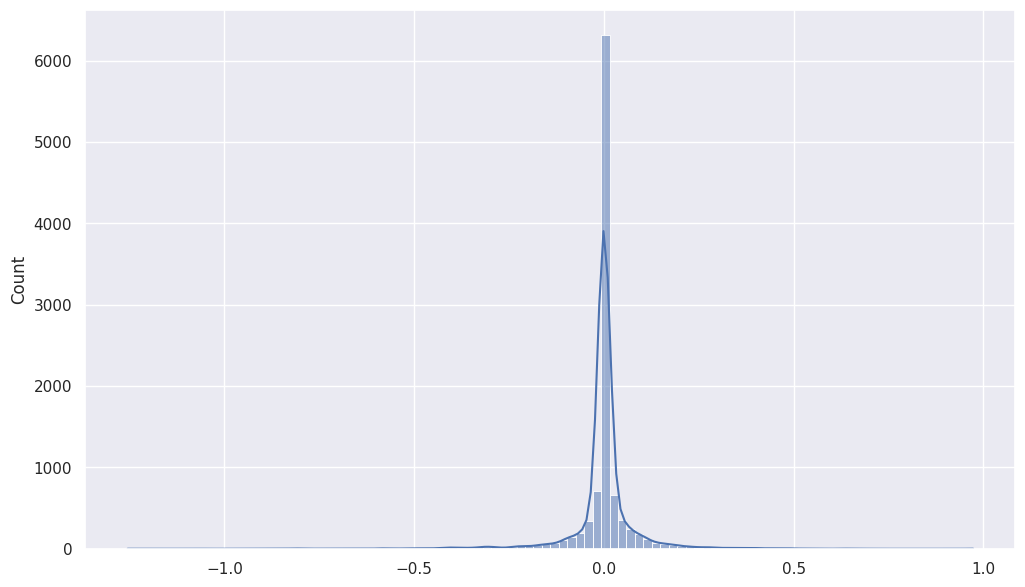

In [86]:
plt.figure(figsize=(12,7))
sns.histplot(Y1_test-Y_rf1, kde=True, bins=100)
plt.show()

In [87]:
rf2 = RandomForestRegressor()
rf2.fit(X2_train, Y2_train)

RandomForestRegressor()

In [88]:
Y_rf2 = rf2.predict(X2_test)
Y_rf2[:100]

array([3.682     , 3.7       , 4.201     , 4.496     , 4.175     ,
       3.598     , 4.399     , 3.727     , 3.7       , 3.798     ,
       3.823     , 3.7       , 3.672     , 4.589     , 3.409     ,
       3.467     , 4.1       , 3.696     , 3.754     , 3.799     ,
       3.103     , 4.178     , 3.985     , 3.302     , 3.3828    ,
       3.7       , 3.162     , 3.139     , 4.202     , 3.923     ,
       2.619     , 3.632     , 3.7       , 3.656     , 3.7       ,
       3.964     , 3.913     , 3.7       , 3.564     , 4.196     ,
       3.7       , 4.08      , 3.68275   , 3.45403333, 3.042     ,
       3.019     , 4.205     , 3.28816667, 4.298     , 3.7       ,
       3.822     , 3.539     , 3.90541667, 3.365     , 3.7       ,
       3.33475556, 3.848     , 3.7       , 3.7       , 3.7       ,
       3.18      , 3.629     , 3.7       , 3.697     , 3.567     ,
       3.7       , 3.7       , 3.7       , 3.3535    , 4.075     ,
       3.542     , 4.18      , 3.287     , 4.08      , 4.3    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


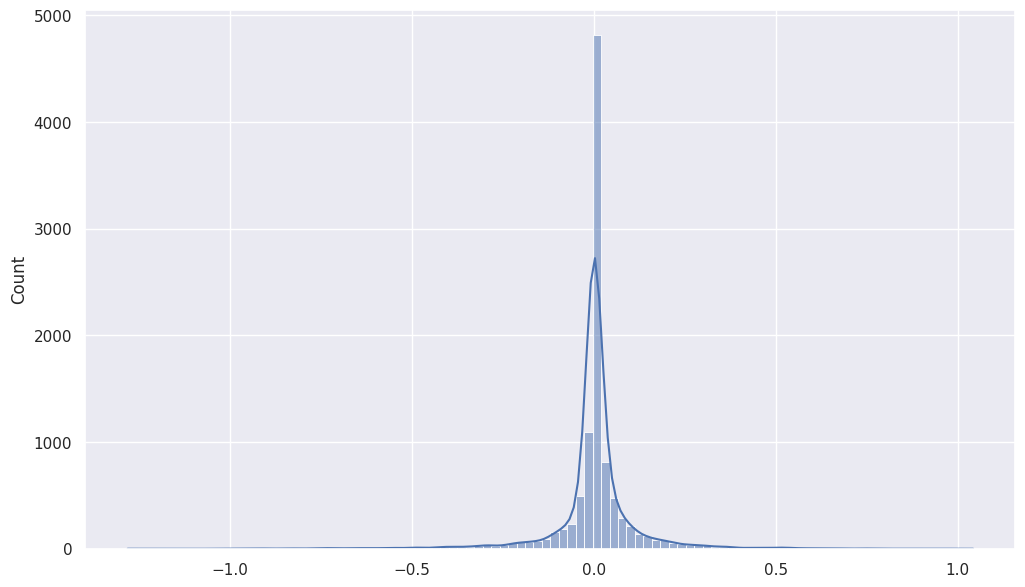

In [89]:
plt.figure(figsize=(12,7))
sns.histplot(Y2_test - Y_rf2, kde=True, bins=100)
plt.show()

# Decision Tree Regressor


In [90]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, Y1_train)

DecisionTreeRegressor()

In [91]:
Y_dt1 = dt1.predict(X1_test)
Y_dt1[:100]

array([3.6       , 4.1       , 3.7       , 4.4       , 4.        ,
       4.1       , 4.4       , 3.8       , 3.6       , 4.1       ,
       3.5       , 4.5       , 3.8       , 3.4       , 4.5       ,
       3.9       , 3.8       , 3.3       , 4.4       , 4.1       ,
       4.4       , 3.7       , 3.1       , 3.5       , 3.7       ,
       3.5       , 3.7       , 3.32857143, 2.9       , 4.3       ,
       3.5       , 3.7       , 3.7       , 4.4       , 3.8       ,
       3.1       , 3.2       , 3.7       , 4.5       , 3.7       ,
       3.7       , 3.7       , 3.8       , 3.9       , 3.2       ,
       3.7       , 3.6       , 3.7       , 3.8       , 3.15      ,
       4.6       , 2.7       , 3.8       , 3.8       , 3.42222222,
       3.7       , 3.3       , 3.7       , 3.4       , 4.2       ,
       3.9       , 3.4       , 3.7       , 3.7       , 3.8       ,
       4.        , 3.3       , 4.2       , 2.4       , 4.1       ,
       3.3       , 3.7       , 3.4       , 4.        , 3.2    

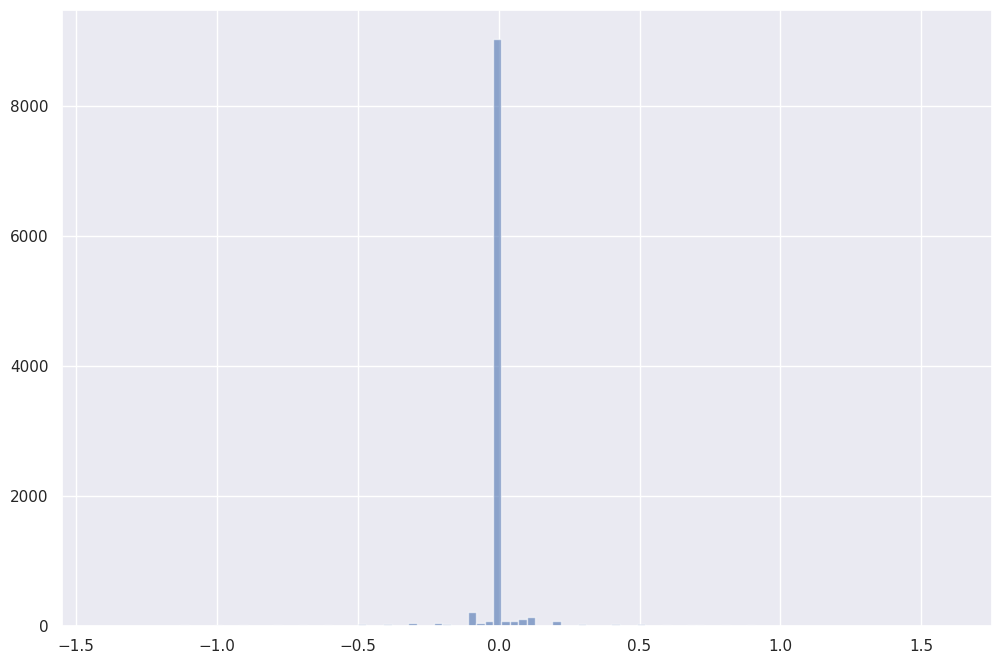

In [92]:
plt.figure(figsize=(12,8))
plt.hist(Y1_test-Y_dt1, bins=100, alpha=0.6)
plt.show()

In [93]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [94]:
Y_dt2 = dt2.predict(X2_test)
Y_dt2[:100]

array([3.7 , 3.7 , 4.2 , 4.5 , 4.2 , 3.6 , 4.4 , 3.7 , 3.7 , 3.8 , 3.8 ,
       3.7 , 3.8 , 4.6 , 3.7 , 3.5 , 4.1 , 3.7 , 3.7 , 3.8 , 3.1 , 4.2 ,
       4.  , 3.3 , 3.4 , 3.7 , 2.8 , 3.1 , 4.2 , 4.  , 2.6 , 3.7 , 3.7 ,
       3.8 , 3.7 , 3.9 , 3.9 , 3.7 , 3.6 , 4.2 , 3.7 , 4.1 , 3.9 , 3.3 ,
       3.  , 3.  , 4.2 , 3.2 , 4.3 , 3.7 , 3.8 , 3.6 , 4.  , 3.4 , 3.7 ,
       3.4 , 3.7 , 3.7 , 3.7 , 3.7 , 3.1 , 3.7 , 3.7 , 3.7 , 3.5 , 3.7 ,
       3.7 , 3.7 , 3.4 , 4.1 , 3.5 , 4.2 , 3.3 , 4.1 , 4.3 , 3.8 , 3.7 ,
       3.6 , 3.2 , 3.5 , 3.4 , 4.  , 3.6 , 3.  , 4.5 , 4.7 , 3.6 , 3.9 ,
       4.  , 2.8 , 3.5 , 3.7 , 3.8 , 3.9 , 3.1 , 3.75, 3.4 , 3.7 , 3.6 ,
       4.  ])

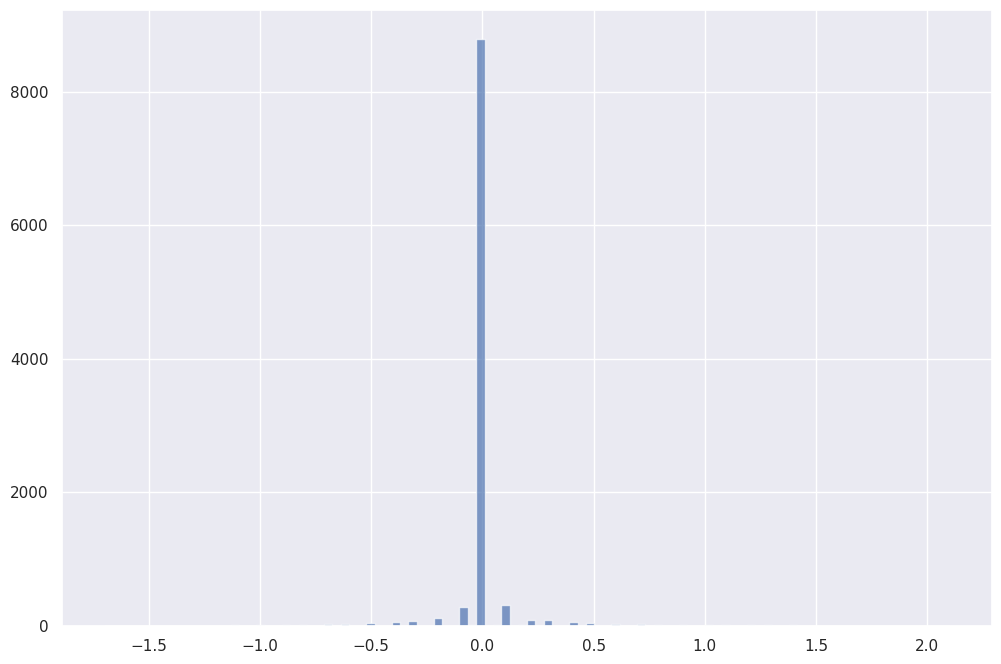

In [95]:
plt.figure(figsize=(12,8))
plt.hist(Y2_test - Y_dt2, bins=100, alpha=0.7)
plt.show()

# Model Evaluation


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
mae =  mean_absolute_error(Y1_test, Y_lr1)
mse = mean_squared_error(Y1_test, Y_lr1)
r2score = r2_score(Y1_test, Y_lr1)

print("Coefficient of Determination for train data : ",lr1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",lr1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.3594943706845596
Coefficient of Determination for test data :  0.34981153967483913
Mean Absolute Error :  0.24291915864382402
Mean Squared Error :  0.10220012017923398
Root Mean Squared Error :  0.31968753522656146
R2 Score :  0.34981153967483913


In [98]:
mae =  mean_absolute_error(Y2_test, Y_lr2)
mse = mean_squared_error(Y2_test, Y_lr2)
r2score = r2_score(Y2_test, Y_lr2)

print("Coefficient of Determination for train data : ",lr2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",lr2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.3466153008833477
Coefficient of Determination for test data :  0.33357791111951773
Mean Absolute Error :  0.24125020200510197
Mean Squared Error :  0.10311475490905808
Root Mean Squared Error :  0.3211148624854634
R2 Score :  0.33357791111951773


In [99]:
mae =  mean_absolute_error(Y1_test, Y_rf1)
mse = mean_squared_error(Y1_test, Y_rf1)
r2score = r2_score(Y1_test, Y_rf1)

print("Coefficient of Determination for train data : ",rf1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",rf1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9903260732025301
Coefficient of Determination for test data :  0.9381555769261818
Mean Absolute Error :  0.037813256008626825
Mean Squared Error :  0.009721039139019332
Root Mean Squared Error :  0.09859533020898774
R2 Score :  0.9381555769261818


In [100]:
mae =  mean_absolute_error(Y2_test, Y_rf2)
mse = mean_squared_error(Y2_test, Y_rf2)
r2score = r2_score(Y2_test, Y_rf2)

print("Coefficient of Determination for train data : ",rf2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",rf2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9840015709304384
Coefficient of Determination for test data :  0.8939940242645842
Mean Absolute Error :  0.057655173821005525
Mean Squared Error :  0.016402187726423507
Root Mean Squared Error :  0.12807102610045532
R2 Score :  0.8939940242645842


In [101]:
mae =  mean_absolute_error(Y1_test, Y_dt1)
mse = mean_squared_error(Y1_test, Y_dt1)
r2score = r2_score(Y1_test, Y_dt1)

print("Coefficient of Determination for train data : ",dt1.score(X1_train, Y1_train))
print("Coefficient of Determination for test data : ",dt1.score(X1_test, Y1_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9988996954568665
Coefficient of Determination for test data :  0.9222384985270744
Mean Absolute Error :  0.02548049479580543
Mean Squared Error :  0.012222971154972893
Root Mean Squared Error :  0.1105575468024363
R2 Score :  0.9222384985270744


In [102]:
mae =  mean_absolute_error(Y2_test, Y_dt2)
mse = mean_squared_error(Y2_test, Y_dt2)
r2score = r2_score(Y2_test, Y_dt2)


print("Coefficient of Determination for train data : ",dt2.score(X2_train, Y2_train))
print("Coefficient of Determination for test data : ",dt2.score(X2_test, Y2_test))
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse) 
print("Root Mean Squared Error : ", np.sqrt(mse))
print("R2 Score : ", r2score) 

Coefficient of Determination for train data :  0.9991042568511765
Coefficient of Determination for test data :  0.8250465410255292
Mean Absolute Error :  0.044412267839775525
Mean Squared Error :  0.02707035577549694
Root Mean Squared Error :  0.16453071377556513
R2 Score :  0.8250465410255292
